In [2]:
# Импорт библиотек
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
# Загрузка данных
train_df = pd.read_csv("data/preprocessed/clean_train.csv", sep=";")
test_df = pd.read_csv("data/preprocessed/clean_test.csv", sep=";")

In [4]:
# Векторизация текста
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=20000, min_df=2)
X_train = vectorizer.fit_transform(train_df["message"])
X_test = vectorizer.transform(test_df["message"])
y_train = train_df["is_toxic"]
y_test = test_df["is_toxic"]

In [5]:
# Обучение модели
model = LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


              precision    recall  f1-score   support

           0      0.922     0.899     0.911       119
           1      0.893     0.917     0.905       109

    accuracy                          0.908       228
   macro avg      0.908     0.908     0.908       228
weighted avg      0.908     0.908     0.908       228

F1-score: 0.905


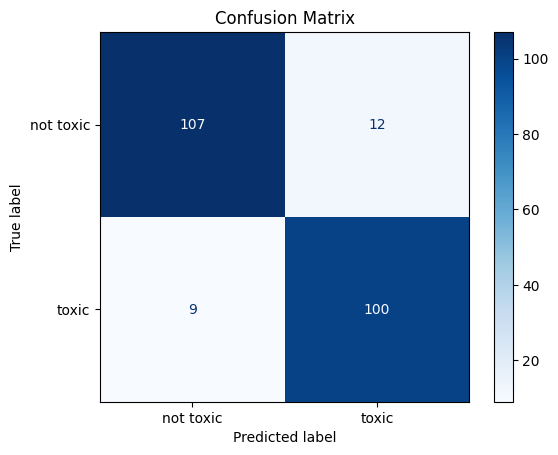

In [6]:
# Оценка качества
pred = model.predict(X_test)
print(classification_report(y_test, pred, digits=3))
print("F1-score:", round(f1_score(y_test, pred), 3))

cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(cm, display_labels=["not toxic", "toxic"]).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [7]:
# Анализ весов модели
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]

top_positive = np.argsort(coefs)[-15:][::-1]
top_negative = np.argsort(coefs)[:15]

In [8]:
print("Топ токсичных слов:")
for idx in top_positive:
    print(f"{feature_names[idx]:<25} {coefs[idx]:.3f}")

Топ токсичных слов:
ugly                      9.300
darn                      5.843
crap                      5.037
hate                      5.011
sucks                     4.991
damnit                    4.369
damni                     3.881
dammit                    3.583
suck                      3.430
crapi                     3.408
damn                      3.398
screwedup                 3.380
oh                        3.311
stupid                    3.025
awful                     2.954


In [9]:
print("\nТоп нетоксичных слов:")
for idx in top_negative:
    print(f"{feature_names[idx]:<25} {coefs[idx]:.3f}")


Топ нетоксичных слов:
remove                    -3.979
kill                      -3.766
pid                       -3.472
self                      -3.451
should                    -3.360
question                  -3.356
nit                       -3.015
die                       -3.012
false                     -2.853
be                        -2.772
use                       -2.769
below                     -2.496
py                        -2.456
useless                   -2.421
by                        -2.400
